# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
plt.rcParams["figure.figsize"] = (8,5)
%matplotlib inline

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score, auc, precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
f_df = pd.read_csv("ANSUR II FEMALE Public.csv", encoding='ISO-8859-1')
m_df = pd.read_csv("ANSUR II MALE Public.csv", encoding='ISO-8859-1')

In [3]:
df = pd.concat([f_df,m_df])
df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 4081
Columns: 109 entries, SubjectId to subjectid
dtypes: float64(2), int64(98), object(9)
memory usage: 5.1+ MB


In [5]:
df.shape

(6068, 109)

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

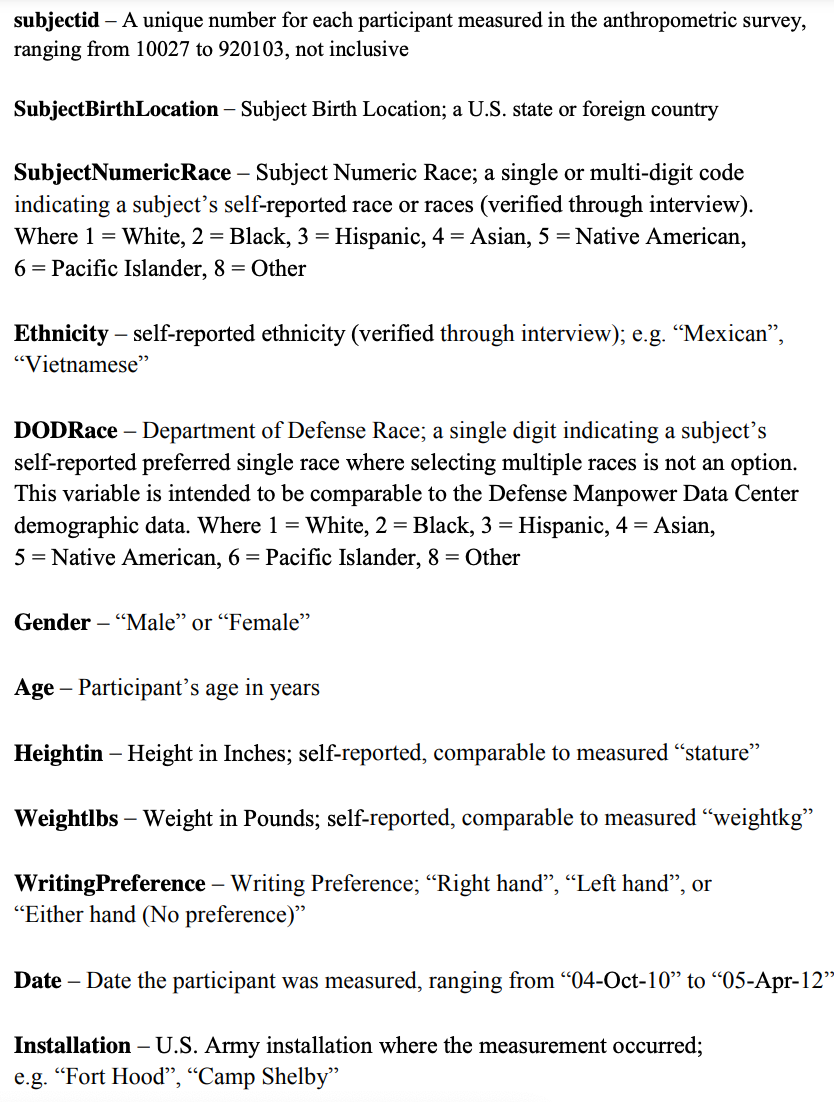
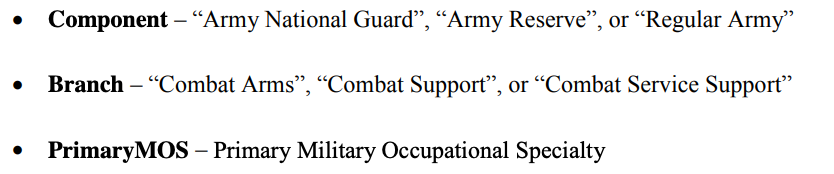

+ Dropping the unnessesary(due to noise) features,
  
  * subjectid
  * SubjectNumericRace - due to multicolinearity and data leakage concern with DODRace (target variable)
  * Ethnicity
  * Heightin - due to multicolinearity with stature
  * Weightlbs - due to multicolinearity with weightkg
  * Date
  * Installation
  * Component
  * PrimaryMOS


In [6]:
# List of columns to drop
columns_to_drop = [
    "SubjectId", 
    "SubjectNumericRace", 
    "Ethnicity", 
    "Heightin", 
    "Weightlbs", 
    "Date", 
    "Installation", 
    "Component", 
    "PrimaryMOS",
    "subjectid"
]

# Drop the specified columns
df = df.drop (columns_to_drop, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 4081
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [8]:
df["DODRace"].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

* Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [9]:
df = df[df["DODRace"].isin([1,2,3])]
df["DODRace"].value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
...,...,...,...,...,...,...,...,...
weightkg,5769.0,800.981106,155.990338,358.0,686.0,790.0,900.0,1442.0
wristcircumference,5769.0,169.308372,13.060900,124.0,159.0,171.0,179.0,216.0
wristheight,5769.0,831.334547,47.321580,688.0,798.0,831.0,864.0,1009.0
DODRace,5769.0,1.460392,0.695637,1.0,1.0,1.0,2.0,3.0


In [11]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [12]:
cat = df.select_dtypes("object").columns
cat

Index(['Gender', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [13]:
num = df.select_dtypes("number").columns

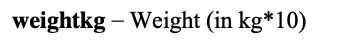

In [14]:
df["weightkg"] = df["weightkg"] / 10

In [15]:
df.select_dtypes("number").corr() 

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Age
abdominalextensiondepthsitting,1.000000,0.351934,0.312919,0.518896,0.280824,0.456729,0.332593,0.417617,0.691126,0.505856,...,0.858962,0.939645,0.958716,0.579494,0.147130,0.825198,0.546947,0.383157,-0.031860,0.385555
acromialheight,0.351934,1.000000,0.868267,0.504673,0.987115,0.693952,0.797793,0.733288,0.522740,0.401588,...,0.438562,0.405161,0.362314,0.607020,0.930954,0.677768,0.733564,0.921268,-0.217393,0.082966
acromionradialelength,0.312919,0.868267,1.000000,0.416051,0.857391,0.604208,0.725966,0.667377,0.452499,0.343457,...,0.373562,0.354902,0.327976,0.480876,0.845864,0.595740,0.642518,0.677140,-0.158561,0.081739
anklecircumference,0.518896,0.504673,0.416051,1.000000,0.461200,0.709550,0.561528,0.536816,0.637641,0.450363,...,0.585273,0.564041,0.510282,0.482198,0.408262,0.741326,0.697485,0.508567,-0.157784,-0.026483
axillaheight,0.280824,0.987115,0.857391,0.461200,1.000000,0.657023,0.785011,0.705028,0.457740,0.361619,...,0.362550,0.328417,0.290065,0.567598,0.946468,0.613565,0.685336,0.903063,-0.205576,0.044501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weightkg,0.825198,0.677768,0.595740,0.741326,0.613565,0.730920,0.645382,0.703679,0.875365,0.580564,...,0.858881,0.872855,0.830974,0.679795,0.519696,1.000000,0.798308,0.665846,-0.096400,0.233398
wristcircumference,0.546947,0.733564,0.642518,0.697485,0.685336,0.827143,0.743230,0.803051,0.760451,0.348062,...,0.578244,0.576793,0.553025,0.617985,0.632789,0.798308,1.000000,0.663459,-0.174408,0.150658
wristheight,0.383157,0.921268,0.677140,0.508567,0.903063,0.629620,0.683307,0.621811,0.501066,0.460298,...,0.479839,0.440938,0.388914,0.617996,0.812746,0.665846,0.663459,1.000000,-0.267874,0.110000
DODRace,-0.031860,-0.217393,-0.158561,-0.157784,-0.205576,-0.111249,-0.059867,-0.113701,-0.031438,-0.203874,...,-0.125099,-0.071195,-0.031391,-0.160391,-0.174910,-0.096400,-0.174408,-0.267874,1.000000,0.013222


In [16]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print("******")

Gender
Male      3899
Female    1870
Name: Gender, dtype: int64
******
Branch
Combat Service Support    3021
Combat Arms               1508
Combat Support            1240
Name: Branch, dtype: int64
******
SubjectsBirthLocation
California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
                         ... 
Bosnia and Herzegovina      1
Bermuda                     1
Denmark                     1
South Korea                 1
Guatemala                   1
Name: SubjectsBirthLocation, Length: 136, dtype: int64
******
WritingPreference
Right hand                     5088
Left hand                       622
Either hand (No preference)      59
Name: WritingPreference, dtype: int64
******


In [17]:
df.groupby("SubjectsBirthLocation")["DODRace"].value_counts()

SubjectsBirthLocation  DODRace
Alabama                1          90
                       2          74
Alaska                 1           7
Antigua and Barbuda    2           2
Argentina              3           1
                                  ..
Wisconsin              1          94
                       2           3
                       3           2
Wyoming                1           7
Zambia                 2           1
Name: DODRace, Length: 227, dtype: int64

In [18]:
# Re-defining the list of US states for grouping
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", 
    "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", 
    "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", 
    "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", 
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", 
    "Wisconsin", "Wyoming", "District of Columbia", "Puerto Rico"
]

# Grouping US states under 'USA'
df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].apply(lambda x: "USA" if x in us_states else x)

# Group by 'SubjectsBirthLocation' and 'DODRace', then summing the counts
grouped_df = df.groupby(['SubjectsBirthLocation', 'DODRace']).sum().reset_index()

grouped_df

,SubjectsBirthLocation,DODRace,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
0,Antigua and Barbuda,2,568,2847,671,444,2661,499,388,770,...,924,707,2100,564,706,2113,184.4,341,1697,69
1,Argentina,3,256,1375,305,226,1259,238,185,371,...,406,345,939,224,350,1011,80.5,153,848,35
2,Azerbaijan,1,180,1188,276,188,1088,206,169,283,...,386,259,720,165,320,839,46.7,138,751,35
3,Bahamas,2,299,1418,332,211,1318,254,190,392,...,464,357,1027,276,377,1052,89.5,169,834,40
4,Barbados,2,1136,7146,1685,1101,6655,1290,1015,2015,...,2209,1392,4135,1041,1770,5361,369.4,860,4130,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,United Kingdom,1,2270,13894,3254,2150,12896,2365,1886,3813,...,4531,3175,8763,2141,3712,10151,717.4,1598,8287,297
99,United Kingdom,2,224,1566,363,215,1452,250,213,427,...,492,285,854,221,400,1150,78.3,180,891,38
100,United States,2,440,2664,664,422,2502,469,368,767,...,827,579,1668,423,688,1980,135.0,311,1516,53
101,Venezuela,3,206,1328,306,216,1234,234,180,356,...,413,304,848,192,362,976,67.6,158,806,23


In [19]:
df.drop(["SubjectsBirthLocation"],axis=1,inplace=True)

In [20]:
df["DODRace"] = df.DODRace.map({1 : 2, 2 : 1, 3 : 0})
df.DODRace.value_counts()

2    3792
1    1298
0     679
Name: DODRace, dtype: int64

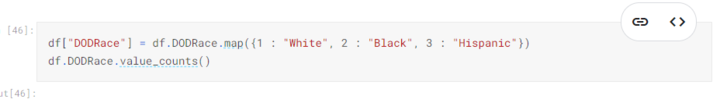

In [21]:
df.to_csv("DODRace_Cleaned", index=False)

In [22]:
df = pd.read_csv("DODRace_Cleaned")

# Vis

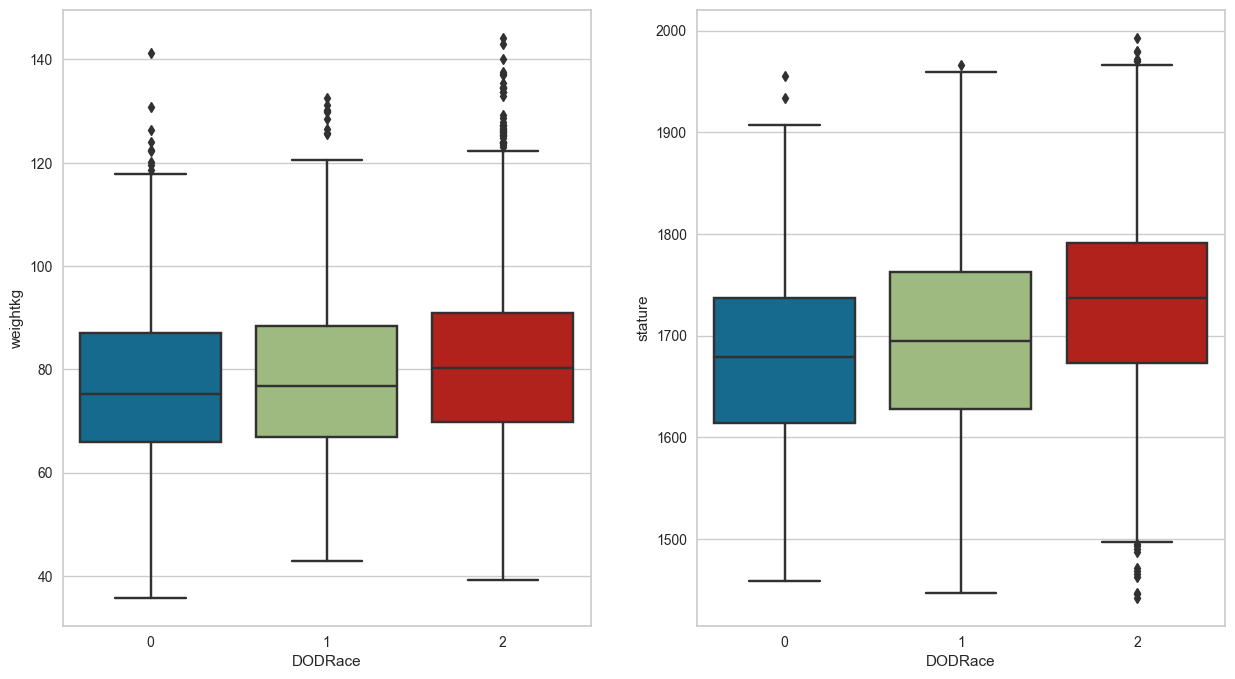

In [23]:
index = 0
plt.figure(figsize=(15,8))
for feature in df[["weightkg","stature"]].columns:
    if feature != "DODRace":
        index += 1
        plt.subplot(1,2,index)
        sns.boxplot(x='DODRace', y=feature, data=df)
plt.show()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

# Preprocessing

In [24]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,DODRace,Age,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,...,345,942,65.7,152,756,Female,Combat Support,1,26,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,...,329,1032,53.4,155,815,Female,Combat Service Support,0,21,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,...,367,1035,66.3,162,799,Female,Combat Service Support,2,23,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,...,371,999,78.2,173,818,Female,Combat Service Support,1,22,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,...,380,911,88.6,152,762,Female,Combat Arms,2,45,Right hand


In [25]:
X = df.drop(columns="DODRace")
y = df.DODRace

# Splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# Encoding

In [27]:
cat_onehot = ["Branch", "WritingPreference", "Gender"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False), cat_onehot), 
                                       remainder='passthrough')

In [28]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [29]:
features = column_trans.get_feature_names_out()
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

,onehotencoder__Branch_Combat Service Support,onehotencoder__Branch_Combat Support,onehotencoder__WritingPreference_Left hand,onehotencoder__WritingPreference_Right hand,onehotencoder__Gender_Male,remainder__abdominalextensiondepthsitting,remainder__acromialheight,remainder__acromionradialelength,remainder__anklecircumference,remainder__axillaheight,...,remainder__waistbacklength,remainder__waistbreadth,remainder__waistcircumference,remainder__waistdepth,remainder__waistfrontlengthsitting,remainder__waistheightomphalion,remainder__weightkg,remainder__wristcircumference,remainder__wristheight,remainder__Age
2709,1.0,0.0,0.0,1.0,1.0,248.0,1418.0,349.0,233.0,1315.0,...,445.0,299.0,900.0,234.0,376.0,1061.0,82.8,181.0,800.0,43.0
265,0.0,1.0,0.0,1.0,0.0,239.0,1399.0,321.0,234.0,1297.0,...,464.0,331.0,930.0,214.0,385.0,1028.0,76.5,167.0,840.0,37.0
4388,0.0,0.0,0.0,1.0,1.0,223.0,1429.0,336.0,224.0,1324.0,...,476.0,309.0,870.0,202.0,364.0,1042.0,74.6,174.0,822.0,31.0
3666,1.0,0.0,0.0,1.0,1.0,226.0,1489.0,365.0,224.0,1375.0,...,511.0,294.0,841.0,200.0,422.0,1098.0,88.0,181.0,865.0,22.0
3958,0.0,0.0,0.0,1.0,1.0,307.0,1390.0,325.0,234.0,1278.0,...,475.0,348.0,1066.0,288.0,400.0,990.0,89.8,185.0,827.0,50.0


In [30]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

,onehotencoder__Branch_Combat Service Support,onehotencoder__Branch_Combat Support,onehotencoder__WritingPreference_Left hand,onehotencoder__WritingPreference_Right hand,onehotencoder__Gender_Male,remainder__abdominalextensiondepthsitting,remainder__acromialheight,remainder__acromionradialelength,remainder__anklecircumference,remainder__axillaheight,...,remainder__waistbacklength,remainder__waistbreadth,remainder__waistcircumference,remainder__waistdepth,remainder__waistfrontlengthsitting,remainder__waistheightomphalion,remainder__weightkg,remainder__wristcircumference,remainder__wristheight,remainder__Age
2624,0.0,1.0,0.0,1.0,1.0,299.0,1592.0,365.0,247.0,1448.0,...,494.0,372.0,1098.0,275.0,387.0,1190.0,112.9,202.0,944.0,39.0
4622,1.0,0.0,1.0,0.0,1.0,261.0,1470.0,343.0,245.0,1340.0,...,480.0,339.0,950.0,235.0,399.0,1077.0,95.4,178.0,855.0,19.0
5642,0.0,0.0,0.0,1.0,1.0,322.0,1442.0,331.0,240.0,1310.0,...,512.0,374.0,1120.0,313.0,414.0,1019.0,104.9,182.0,885.0,39.0
4369,0.0,0.0,0.0,1.0,1.0,254.0,1537.0,361.0,227.0,1415.0,...,525.0,328.0,961.0,244.0,390.0,1102.0,90.5,170.0,895.0,20.0
47,0.0,1.0,1.0,0.0,0.0,189.0,1300.0,293.0,199.0,1233.0,...,413.0,249.0,679.0,168.0,349.0,944.0,47.7,149.0,791.0,26.0


## Functions

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [32]:
def plot_combined_pr_curve(model, X_train, y_train, X_test, y_test, classes):
    plt.figure(figsize=(10, 7))
    
    # Store handles and labels for the legend
    handles = []
    labels = []
    
    for cls in classes:
        # Set the class as positive and all other classes as negative
        binary_y_train = [1 if label == cls else 0 for label in y_train]
        binary_y_test = [1 if label == cls else 0 for label in y_test]
        
        # Fit the model on the binary transformed labels
        model.fit(X_train, binary_y_train)
        
        # Predict probabilities and get precision-recall values
        probas = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(binary_y_test, probas)
        
        # Calculate average precision
        avg_precision = average_precision_score(binary_y_test, probas)
        
        # Plot the precision-recall curve
        handle, = plt.plot(recall, precision, label=f'{cls} (AP={avg_precision:.2f})')
        
        # Plot a horizontal line for average precision
        plt.axhline(y=avg_precision, color=handle.get_color(), linestyle='--')
        
        # Append handle and label for legend
        handles.append(handle)
        labels.append(f'{cls} (AP={avg_precision:.2f})')
    
    # Set labels and title, then show the plot
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for Multiple Classes')
    plt.legend(handles=handles, labels=labels)
    plt.show()
# Plot combined Precision-Recall curves for the three classes
classes = df['DODRace'].unique()

In [33]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[10], feature_names=X_train.columns, 
          # class_names olarak string değerleri belirtme
          class_names = [str(name) for name in df.DODRace.unique()],
          filled = True,
          fontsize = 8);

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [34]:
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(class_weight="balanced", max_iter=10000))]

log_pipe = Pipeline(steps=operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [35]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 403   39  101]
 [  62  950   26]
 [ 532   57 2445]]
              precision    recall  f1-score   support

           0       0.40      0.74      0.52       543
           1       0.91      0.92      0.91      1038
           2       0.95      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.82      0.77      4615
weighted avg       0.88      0.82      0.84      4615


Test_Set
[[ 93  14  29]
 [ 20 235   5]
 [139  13 606]]
              precision    recall  f1-score   support

           0       0.37      0.68      0.48       136
           1       0.90      0.90      0.90       260
           2       0.95      0.80      0.87       758

    accuracy                           0.81      1154
   macro avg       0.74      0.80      0.75      1154
weighted avg       0.87      0.81      0.83      1154



In [36]:
model = LogisticRegression(class_weight="balanced")

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.362518,0.004809,0.731602,0.811651,0.731602,0.760067
2,0.187992,0.001823,0.755411,0.834190,0.755411,0.781402
3,0.270774,0.005431,0.712121,0.846459,0.712121,0.752331
4,0.275326,0.001687,0.755411,0.821398,0.755411,0.775889
5,0.251402,0.001687,0.748918,0.821911,0.748918,0.771182
6,0.215819,0.004203,0.731020,0.825023,0.731020,0.760273
7,0.192116,0.007493,0.791757,0.846801,0.791757,0.811452
8,0.241713,0.005012,0.735358,0.826941,0.735358,0.766709
9,0.272185,0.003917,0.761388,0.835187,0.761388,0.785024
10,0.196200,0.004937,0.752711,0.835992,0.752711,0.779999


### Matthews Correlation Coefficient

+ Unbalanced, multiclass datalarda Matthews Correlation Coefficient kullanılmalıdır. Accuracy, alternafidir.

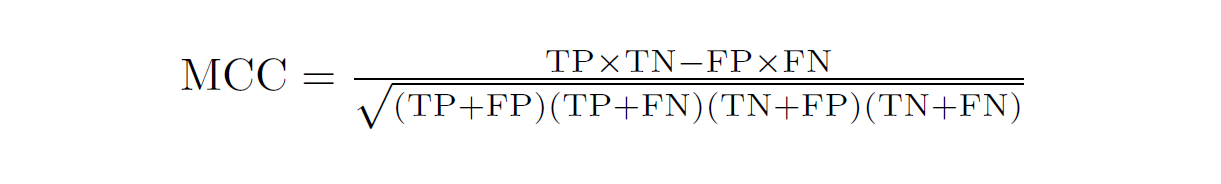

In [37]:
y_pred = log_pipe.predict(X_test)
matt_log_van = matthews_corrcoef(y_test, y_pred)
matt_log_van

0.6734401726554158

### Logistic Model GridsearchCV

In [38]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

from sklearn.model_selection import RandomizedSearchCV
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=1000, class_weight="balanced"))]

log_pipe = Pipeline(steps=operations)

distributions = {
    "logistic__C": np.logspace(-1, 5, 20),
    "logistic__penalty": ['l2', 'l1'],
    "logistic__solver": ["liblinear"]
}

# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring=f1_Hispanic, cv=10)
grid_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=1000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l2', 'l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [39]:
grid_model.best_params_

{'logistic__solver': 'liblinear',
 'logistic__penalty': 'l2',
 'logistic__C': 0.1}

In [40]:
grid_model.best_score_

0.5286914302174759

In [41]:
eval_metric(grid_model,X_train, y_train, X_test, y_test)

Train_Set
[[ 298   57  188]
 [  23  969   46]
 [ 182   57 2795]]
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       543
           1       0.89      0.93      0.91      1038
           2       0.92      0.92      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.80      0.80      0.80      4615
weighted avg       0.88      0.88      0.88      4615


Test_Set
[[ 67  16  53]
 [  8 244   8]
 [ 46  18 694]]
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       136
           1       0.88      0.94      0.91       260
           2       0.92      0.92      0.92       758

    accuracy                           0.87      1154
   macro avg       0.78      0.78      0.78      1154
weighted avg       0.87      0.87      0.87      1154



In [42]:
y_pred = grid_model.predict(X_test)
matt_log_random = matthews_corrcoef(y_test, y_pred)
matt_log_random

0.7439380183592286

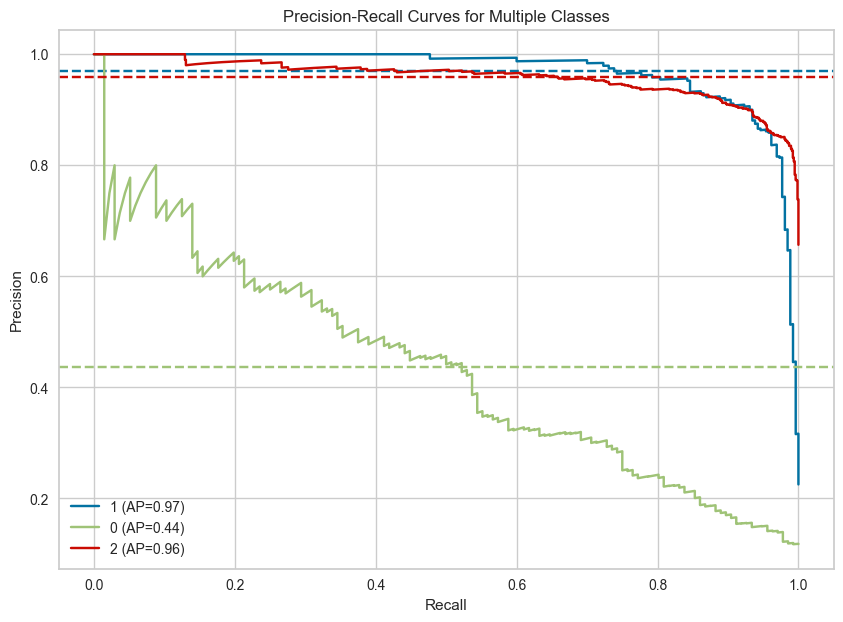

In [43]:
plot_combined_pr_curve(grid_model, X_train, y_train, X_test, y_test, classes)

## Lojistic Regression solver "liblenear" for small dataset

__liblenear__ kucuk datasetlerinde iyi sonuclar verir. Dikkat edilmesi gereken husus; liblinear sadece __penalty="l1"__ ile calisir, yoksa hata verir.

## 2. SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  class_weight düşünülmeli

In [44]:
operations = [("scaler",StandardScaler()),("svc", SVC(class_weight="balanced"))]

log_pipe = Pipeline(steps=operations)

log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

In [45]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 460   20   63]
 [  37  983   18]
 [ 374   36 2624]]
              precision    recall  f1-score   support

           0       0.53      0.85      0.65       543
           1       0.95      0.95      0.95      1038
           2       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615


Test_Set
[[ 77  16  43]
 [ 13 241   6]
 [119  21 618]]
              precision    recall  f1-score   support

           0       0.37      0.57      0.45       136
           1       0.87      0.93      0.90       260
           2       0.93      0.82      0.87       758

    accuracy                           0.81      1154
   macro avg       0.72      0.77      0.74      1154
weighted avg       0.85      0.81      0.82      1154



In [46]:
y_pred = log_pipe.predict(X_test)
matt_svm_van = matthews_corrcoef(y_test, y_pred)
matt_svm_van

0.6609824193306056

###  SVC Model GridsearchCV

In [47]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

param_distributions = {
    'SVC__C': np.linspace(1, 1.3, 10),
    'SVC__gamma': ["scale", "auto"]
}

model = Pipeline([
    ("scaler", StandardScaler()),
    ("SVC", SVC(probability=True))
])

svm_model_random = RandomizedSearchCV(
    model,
    param_distributions,
    n_iter=10,  # Number of random combinations to try
    scoring=f1_Hispanic,
    n_jobs=-1,
    cv=5,
    verbose=1
)

svm_model_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('SVC', SVC(probability=True))]),
                   n_jobs=-1,
                   param_distributions={'SVC__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                                        'SVC__gamma': ['scale', 'auto']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]),
                   verbose=1)

In [48]:
svm_model_random.best_params_

{'SVC__gamma': 'scale', 'SVC__C': 1.3}

In [49]:
svm_model_random.best_score_

0.33797834090524914

In [50]:
eval_metric(svm_model_random, X_train, y_train, X_test, y_test)

Train_Set
[[ 195   37  311]
 [   7  970   61]
 [  14   10 3010]]
              precision    recall  f1-score   support

           0       0.90      0.36      0.51       543
           1       0.95      0.93      0.94      1038
           2       0.89      0.99      0.94      3034

    accuracy                           0.90      4615
   macro avg       0.92      0.76      0.80      4615
weighted avg       0.91      0.90      0.89      4615


Test_Set
[[ 27  14  95]
 [  6 236  18]
 [ 10  15 733]]
              precision    recall  f1-score   support

           0       0.63      0.20      0.30       136
           1       0.89      0.91      0.90       260
           2       0.87      0.97      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.69      0.70      1154
weighted avg       0.84      0.86      0.84      1154



In [51]:
y_pred = svm_model_random.predict(X_test)
matt_svm_random = matthews_corrcoef(y_test, y_pred)
matt_svm_random

0.7173110951588904

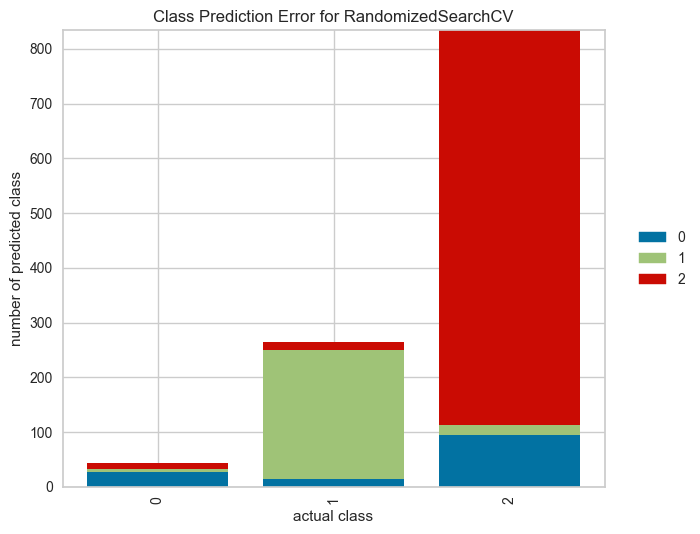

<AxesSubplot:title={'center':'Class Prediction Error for RandomizedSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [52]:
visualizer = ClassPredictionError(svm_model_random)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


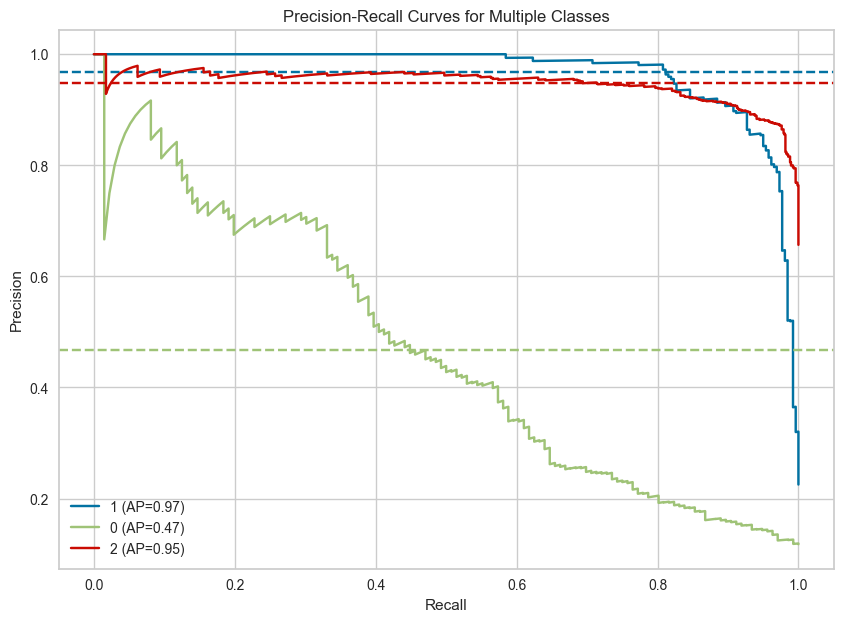

In [53]:
plot_combined_pr_curve(svm_model_random, X_train, y_train, X_test, y_test, classes)

## 3. RF

### Vanilla RF Model

In [54]:
operations = [("scaler",StandardScaler()), ("RF", RandomForestClassifier(random_state=101, class_weight="balanced"))]

rf_pipe = Pipeline(steps=operations)
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [55]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615


Test_Set
[[  4   8 124]
 [  1 177  82]
 [  1   8 749]]
              precision    recall  f1-score   support

           0       0.67      0.03      0.06       136
           1       0.92      0.68      0.78       260
           2       0.78      0.99      0.87       758

    accuracy                           0.81      1154
   macro avg       0.79      0.57      0.57      1154
weighted avg       0.80      0.81      0.76      1154



In [56]:
y_pred = rf_pipe.predict(X_test)
matt_rf_van = matthews_corrcoef(y_test, y_pred)
matt_rf_van

0.5889263962966218

###  RF Model Feature Importance

In [57]:
model = RandomForestClassifier(random_state=101,class_weight="balanced").fit(X_train,y_train)
rf_feature_imp = pd.DataFrame(index = X_train.columns, data = model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
remainder__sittingheight,0.036465
remainder__eyeheightsitting,0.034150
remainder__bicristalbreadth,0.026734
remainder__interpupillarybreadth,0.026582
remainder__elbowrestheight,0.026501
...,...
onehotencoder__Gender_Male,0.002336
onehotencoder__Branch_Combat Support,0.001330
onehotencoder__Branch_Combat Service Support,0.001322
onehotencoder__WritingPreference_Right hand,0.000696




Test Set
[[  4   8 124]
 [  1 178  81]
 [  2   8 748]]


              precision    recall  f1-score   support

           0       0.57      0.03      0.06       136
           1       0.92      0.68      0.78       260
           2       0.78      0.99      0.87       758

    accuracy                           0.81      1154
   macro avg       0.76      0.57      0.57      1154
weighted avg       0.79      0.81      0.76      1154



Train Set
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



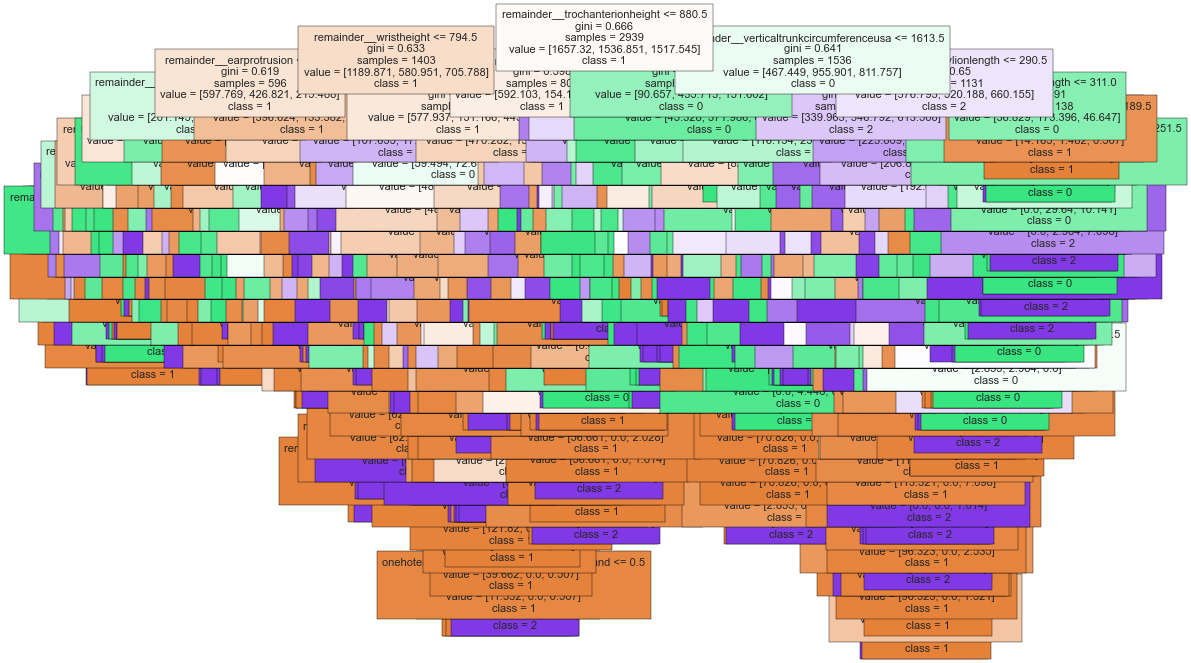

In [58]:
report_model(model)

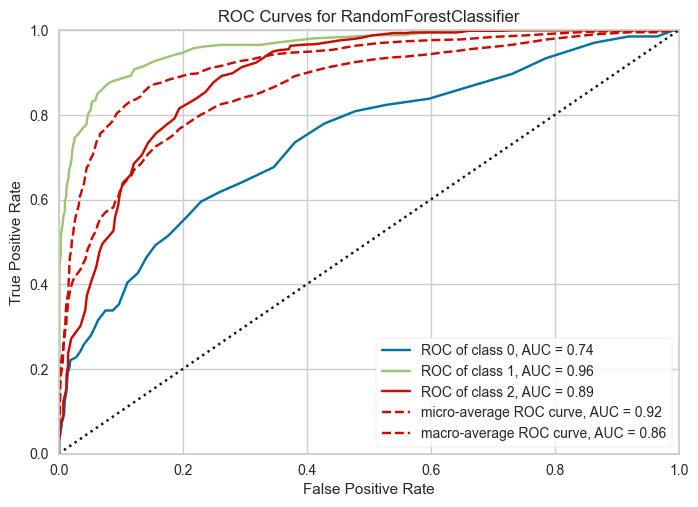

In [59]:
rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_pipe)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

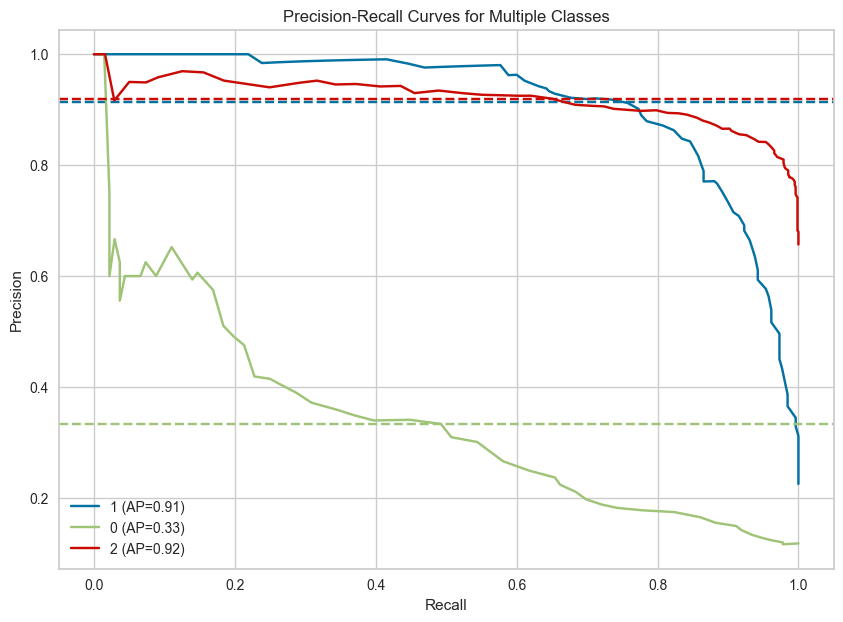

In [60]:
plot_combined_pr_curve(rf_model, X_train, y_train, X_test, y_test, classes)

### RF Model GridsearchCV

In [61]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels=[0] )

operations = [("RF", RandomForestClassifier(random_state=101,class_weight="balanced"))]

rf_pipe = Pipeline(steps=operations)

param_grid = {'RF__n_estimators':[50, 64],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'RF__max_features':[2, 3, 4, "sqrt", "log2"],
             'RF__max_depth':[3, 5, 7],
             'RF__min_samples_split':[2, 3, 5]}

grid_model = GridSearchCV(rf_pipe, 
                          param_grid = param_grid, 
                          scoring = f1_Hispanic,
                          n_jobs=-1,
                          verbose=False)

grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('RF',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF__max_depth': [3, 5, 7],
                         'RF__max_features': [2, 3, 4, 'sqrt', 'log2'],
                         'RF__min_samples_split': [2, 3, 5],
                         'RF__n_estimators': [50, 64]},
             scoring=make_scorer(f1_score, average=None, labels=[0]),
             verbose=False)

In [62]:
grid_model.best_params_

{'RF__max_depth': 7,
 'RF__max_features': 'sqrt',
 'RF__min_samples_split': 5,
 'RF__n_estimators': 64}

In [63]:
y_pred = grid_model.predict(X_test)

matt_rf_grid = matthews_corrcoef(y_test, y_pred)
matt_rf_grid

0.5260325350198557

In [64]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[ 449   13   81]
 [  34  936   68]
 [ 423   93 2518]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.62       543
           1       0.90      0.90      0.90      1038
           2       0.94      0.83      0.88      3034

    accuracy                           0.85      4615
   macro avg       0.78      0.85      0.80      4615
weighted avg       0.88      0.85      0.86      4615


Test_Set
[[ 66  19  51]
 [ 22 208  30]
 [149  37 572]]
              precision    recall  f1-score   support

           0       0.28      0.49      0.35       136
           1       0.79      0.80      0.79       260
           2       0.88      0.75      0.81       758

    accuracy                           0.73      1154
   macro avg       0.65      0.68      0.65      1154
weighted avg       0.79      0.73      0.75      1154



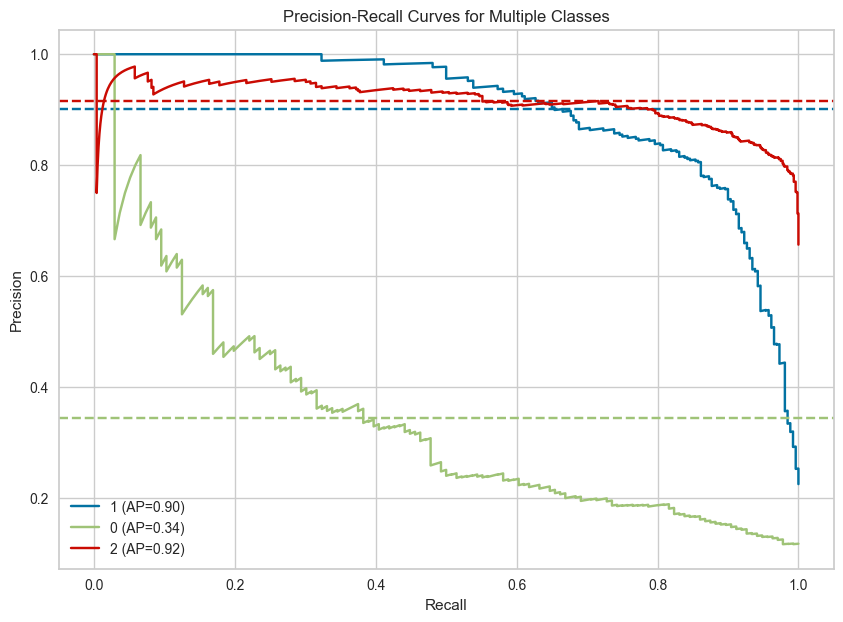

In [65]:
plot_combined_pr_curve(grid_model, X_train, y_train, X_test, y_test, classes)

## XGBoost Model

### Vanilla XGBoost Model

In [66]:
operations = [("XGB", XGBClassifier(random_state=101,class_weight="balanced"))]

xgb_pipe = Pipeline(steps=operations)

xgb_pipe.fit(X_train, y_train)

# Later, after predictions, you can convert the predicted numeric labels back to their original categorical form using le.inverse_transform()

[21:46:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               class_weight='balanced', colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [67]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 543    0    0]
 [   0 1038    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615


Test_Set
[[ 25  14  97]
 [  6 219  35]
 [ 19  12 727]]
              precision    recall  f1-score   support

           0       0.50      0.18      0.27       136
           1       0.89      0.84      0.87       260
           2       0.85      0.96      0.90       758

    accuracy                           0.84      1154
   macro avg       0.75      0.66      0.68      1154
weighted avg       0.82      0.84      0.82      1154



In [68]:
y_pred = xgb_pipe.predict(X_test)
matt_xgb_van = matthews_corrcoef(y_test, y_pred)
matt_xgb_van

0.6680726981239227

### XGBoost Model GridsearchCV

class_weight kullanılmadığı için grid searchten çıkardım.

In [69]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels=[0])

operations = [("xgb", XGBClassifier(random_state=101))]

xgb_model = Pipeline(steps=operations)

# Define the parameter grid
param_grid = {
    "xgb__n_estimators": [50, 64, 100, 128, 300],
    'xgb__max_depth': [2, 3, 4, 7, 9], 
    "xgb__learning_rate": [0.1, 0.2, 0.3],
    "xgb__subsample": [0.2, 0.3, 0.5],
    "xgb__colsample_bytree": [0.3, 0.5, 0.7]
}

# Create GridSearchCV instance
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=f1_Hispanic,
    verbose=False,
    cv=5,  # Cross-validation folds
    n_jobs=-1
)


xgb_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=N...
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.3, 0.5, 0.7],
                         'xgb__learning_rate': [0.1, 0.2, 0.3],
                         'xgb__max_depth': [2, 3, 4, 7, 9],
                         'xgb__n_estimators': [50, 64, 100, 128, 300],
                         'xgb__subsample': [0.2, 0.3, 0.5]},
             scoring=make_scorer(f1_score, average=None, labels=[0]),
             verbose=False)

In [70]:
xgb_grid.best_params_

{'xgb__colsample_bytree': 0.5,
 'xgb__learning_rate': 0.2,
 'xgb__max_depth': 2,
 'xgb__n_estimators': 300,
 'xgb__subsample': 0.2}

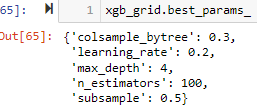

In [71]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Train_Set
[[ 336   29  178]
 [   6  995   37]
 [  23   18 2993]]
              precision    recall  f1-score   support

           0       0.92      0.62      0.74       543
           1       0.95      0.96      0.96      1038
           2       0.93      0.99      0.96      3034

    accuracy                           0.94      4615
   macro avg       0.94      0.85      0.89      4615
weighted avg       0.94      0.94      0.93      4615


Test_Set
[[ 34  15  87]
 [ 10 225  25]
 [ 27  20 711]]
              precision    recall  f1-score   support

           0       0.48      0.25      0.33       136
           1       0.87      0.87      0.87       260
           2       0.86      0.94      0.90       758

    accuracy                           0.84      1154
   macro avg       0.74      0.68      0.70      1154
weighted avg       0.82      0.84      0.82      1154



In [72]:
xgb_grid.best_score_

0.41851899902162903

In [73]:
y_pred = xgb_grid.predict(X_test)
matt_xgb_grid = matthews_corrcoef(y_test, y_pred)
matt_xgb_grid

0.6694704268576289

In [74]:
#plot_combined_pr_curve(xgb_grid, X_train, y_train, X_test, y_test, classes)

In [76]:
model = XGBClassifier(**xgb_grid.best_params_)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X_train.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

[22:11:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgb__colsample_bytree", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators", "xgb__subsample" } are not used.



,xgb_importance
remainder__lateralfemoralepicondyleheight,0.002990
remainder__chestheight,0.003336
remainder__weightkg,0.003865
remainder__tibialheight,0.004285
remainder__overheadfingertipreachsitting,0.004378
...,...
remainder__eyeheightsitting,0.028092
remainder__interpupillarybreadth,0.030768
remainder__heelbreadth,0.031979
remainder__sittingheight,0.046074


## Comparing Models

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

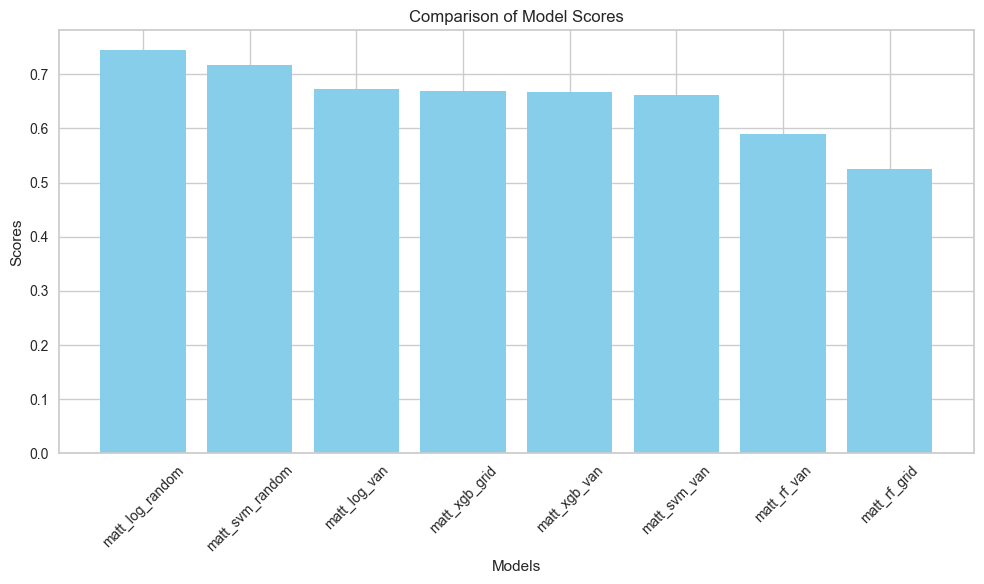

In [77]:
scores = [matt_svm_van, matt_svm_random, matt_log_random, matt_log_van, matt_rf_van, matt_rf_grid, matt_xgb_van, matt_xgb_grid]

# Labels for the models
model_labels = ['matt_svm_van', 'matt_svm_random', 'matt_log_random', 'matt_log_van', "matt_rf_van", "matt_rf_grid", "matt_xgb_van", "matt_xgb_grid"]

# Create pairs of scores and labels, and sort based on scores
sorted_scores_labels = sorted(zip(scores, model_labels), reverse=True)

# Unpack sorted pairs back into separate lists
sorted_scores, sorted_labels = zip(*sorted_scores_labels)

plt.figure(figsize=(10, 6))
plt.bar(sorted_labels, sorted_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Final Model

In [78]:
X_trans = column_trans.transform(X)

In [79]:
X = pd.DataFrame(X_trans, columns=features, index=X.index)
X.head()

,onehotencoder__Branch_Combat Service Support,onehotencoder__Branch_Combat Support,onehotencoder__WritingPreference_Left hand,onehotencoder__WritingPreference_Right hand,onehotencoder__Gender_Male,remainder__abdominalextensiondepthsitting,remainder__acromialheight,remainder__acromionradialelength,remainder__anklecircumference,remainder__axillaheight,...,remainder__waistbacklength,remainder__waistbreadth,remainder__waistcircumference,remainder__waistdepth,remainder__waistfrontlengthsitting,remainder__waistheightomphalion,remainder__weightkg,remainder__wristcircumference,remainder__wristheight,remainder__Age
0,0.0,1.0,0.0,1.0,0.0,231.0,1282.0,301.0,204.0,1180.0,...,406.0,295.0,850.0,217.0,345.0,942.0,65.7,152.0,756.0,26.0
1,1.0,0.0,0.0,1.0,0.0,194.0,1379.0,320.0,207.0,1292.0,...,422.0,254.0,708.0,168.0,329.0,1032.0,53.4,155.0,815.0,21.0
2,1.0,0.0,0.0,1.0,0.0,183.0,1369.0,329.0,233.0,1271.0,...,419.0,269.0,727.0,159.0,367.0,1035.0,66.3,162.0,799.0,23.0
3,1.0,0.0,0.0,1.0,0.0,261.0,1356.0,306.0,214.0,1250.0,...,451.0,302.0,923.0,235.0,371.0,999.0,78.2,173.0,818.0,22.0
4,0.0,0.0,0.0,1.0,0.0,309.0,1303.0,308.0,214.0,1210.0,...,452.0,405.0,1163.0,300.0,380.0,911.0,88.6,152.0,762.0,45.0


In [80]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=10000, class_weight="balanced"))]

log_pipe = Pipeline(steps=operations)

distributions = {
    "logistic__C": np.logspace(-1, 5, 20),
    "logistic__penalty": ['l1'],
    "logistic__solver": ["liblinear"],
}

# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring=f1_Hispanic, cv=5)
grid_model.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=10000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [81]:
y_pred = grid_model.predict(X)
matt_log_van = matthews_corrcoef(y, y_pred)
matt_log_van

0.7576902118947484

In [82]:
grid_model.best_params_

{'logistic__solver': 'liblinear',
 'logistic__penalty': 'l1',
 'logistic__C': 0.42813323987193935}

In [83]:
y_pred = grid_model.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[ 366   76  237]
 [  32 1210   56]
 [ 235   68 3489]]
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       679
           1       0.89      0.93      0.91      1298
           2       0.92      0.92      0.92      3792

    accuracy                           0.88      5769
   macro avg       0.80      0.80      0.80      5769
weighted avg       0.88      0.88      0.88      5769



## Altta yazılı olan başlıklar ile ilgili domain knowledge yapılarak çözüme gelinmeli

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir :

In [84]:
#%pip install imbalanced-learn

In [85]:
# check version number
import imblearn
print(imblearn.__version__)

0.11.0


In [86]:
y_train.value_counts()

2    3034
1    1038
0     543
Name: DODRace, dtype: int64

0 - Hispanic
1 - Black
2 - White

In [87]:
# Oversample and plot imbalanced dataset with SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [88]:
over1 = SMOTE(sampling_strategy={1:3034})
X_train_resampled_over, y_train_resampled_over = over1.fit_resample(X_train, y_train)

# Apply under-sampling (RandomUnderSampler)
over2 = SMOTE(sampling_strategy={0:3034})
X_train_resampled, y_train_resampled = over2.fit_resample(X_train_resampled_over, y_train_resampled_over)

# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),
    ("logistic", LogisticRegression())
]

# Create the pipeline
log_pipe = Pipeline(steps=steps)

# Fit the pipeline on the resampled training data
log_pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [89]:
y_train_resampled.value_counts()

1    3034
2    3034
0    3034
Name: DODRace, dtype: int64

In [90]:
eval_metric(log_pipe, X_train_resampled, y_train_resampled, X_test, y_test)

Train_Set
[[2402  156  476]
 [ 138 2834   62]
 [ 495   50 2489]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      3034
           1       0.93      0.93      0.93      3034
           2       0.82      0.82      0.82      3034

    accuracy                           0.85      9102
   macro avg       0.85      0.85      0.85      9102
weighted avg       0.85      0.85      0.85      9102


Test_Set
[[ 90  10  36]
 [ 22 232   6]
 [125  12 621]]
              precision    recall  f1-score   support

           0       0.38      0.66      0.48       136
           1       0.91      0.89      0.90       260
           2       0.94      0.82      0.87       758

    accuracy                           0.82      1154
   macro avg       0.74      0.79      0.75      1154
weighted avg       0.87      0.82      0.83      1154



## Random Search

In [91]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

over1 = SMOTE(sampling_strategy={1:3034})
X_train_resampled_over, y_train_resampled_over = over1.fit_resample(X_train, y_train)

# Apply under-sampling (RandomUnderSampler)
over2 = SMOTE(sampling_strategy={0:3034})
X_train_resampled, y_train_resampled = over2.fit_resample(X_train_resampled_over, y_train_resampled_over)

# Define the pipeline step
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=1000))]

log_pipe = Pipeline(steps=operations)

distributions = {
    "logistic__C": np.logspace(-1, 5, 20),
    "logistic__penalty": ['l2', 'l1'],
    "logistic__solver": ["liblinear"]
}

# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring=f1_Hispanic, cv=10)
grid_model.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(max_iter=1000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l2', 'l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [92]:
eval_metric(grid_model, X_train_resampled, y_train_resampled, X_test, y_test)

Train_Set
[[2316  176  542]
 [  92 2882   60]
 [ 464   54 2516]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      3034
           1       0.93      0.95      0.94      3034
           2       0.81      0.83      0.82      3034

    accuracy                           0.85      9102
   macro avg       0.85      0.85      0.85      9102
weighted avg       0.85      0.85      0.85      9102


Test_Set
[[ 86  14  36]
 [ 15 240   5]
 [117  17 624]]
              precision    recall  f1-score   support

           0       0.39      0.63      0.49       136
           1       0.89      0.92      0.90       260
           2       0.94      0.82      0.88       758

    accuracy                           0.82      1154
   macro avg       0.74      0.79      0.76      1154
weighted avg       0.86      0.82      0.84      1154



## Logistic Regression Over/Under Sampling

In [93]:
over = SMOTE(sampling_strategy={0:1038})
X_train_resampled_over, y_train_resampled_over = over.fit_resample(X_train, y_train)

# Apply under-sampling (RandomUnderSampler)
under = RandomUnderSampler(sampling_strategy={2:1038})
X_train_resampled, y_train_resampled = under.fit_resample(X_train_resampled_over, y_train_resampled_over)

# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),
    ("logistic", LogisticRegression())
]

# Create the pipeline
log_pipe = Pipeline(steps=steps)

# Fit the pipeline on the resampled training data
log_pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [94]:
y_train_resampled.value_counts()

0    1038
1    1038
2    1038
Name: DODRace, dtype: int64

In [95]:
eval_metric(log_pipe, X_train_resampled, y_train_resampled, X_test, y_test)

Train_Set
[[788  66 184]
 [ 54 957  27]
 [197  19 822]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1038
           1       0.92      0.92      0.92      1038
           2       0.80      0.79      0.79      1038

    accuracy                           0.82      3114
   macro avg       0.82      0.82      0.82      3114
weighted avg       0.82      0.82      0.82      3114


Test_Set
[[ 90  15  31]
 [ 17 238   5]
 [140  16 602]]
              precision    recall  f1-score   support

           0       0.36      0.66      0.47       136
           1       0.88      0.92      0.90       260
           2       0.94      0.79      0.86       758

    accuracy                           0.81      1154
   macro avg       0.73      0.79      0.74      1154
weighted avg       0.86      0.81      0.82      1154



# Grid Search

In [96]:
f1_Hispanic = make_scorer(f1_score, average=None, labels=[0])

over = SMOTE(sampling_strategy={0:1040})
X_train_resampled_over, y_train_resampled_over = over.fit_resample(X_train, y_train)

# Apply under-sampling (RandomUnderSampler)
under = RandomUnderSampler(sampling_strategy={2:1040})
X_train_resampled, y_train_resampled = under.fit_resample(X_train_resampled_over, y_train_resampled_over)

# Define the pipeline step
operations = [("scaler",StandardScaler()),("logistic", LogisticRegression(max_iter=1000))]

log_pipe = Pipeline(steps=operations)

distributions = {
    "logistic__C": np.logspace(-1, 5, 20),
    "logistic__penalty": ['l2', 'l1'],
    "logistic__solver": ["liblinear"]
}

# Create the RandomizedSearchCV model
grid_model = RandomizedSearchCV(log_pipe, distributions, scoring=f1_Hispanic, cv=10)
grid_model.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(max_iter=1000))]),
                   param_distributions={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                        'logistic__penalty': ['l2', 'l1'],
                                        'logistic__solver': ['liblinear']},
                   scoring=make_scorer(f1_score, average=None, labels=[0]))

In [97]:
eval_metric(grid_model, X_train_resampled, y_train_resampled, X_test, y_test)

Train_Set
[[762  81 197]
 [ 45 965  28]
 [146  15 879]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1040
           1       0.91      0.93      0.92      1038
           2       0.80      0.85      0.82      1040

    accuracy                           0.84      3118
   macro avg       0.84      0.84      0.83      3118
weighted avg       0.84      0.84      0.83      3118


Test_Set
[[ 87  16  33]
 [ 13 242   5]
 [125  28 605]]
              precision    recall  f1-score   support

           0       0.39      0.64      0.48       136
           1       0.85      0.93      0.89       260
           2       0.94      0.80      0.86       758

    accuracy                           0.81      1154
   macro avg       0.72      0.79      0.74      1154
weighted avg       0.85      0.81      0.82      1154



#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

+ ML modellerinin karmaşıklığı ve yetenekleri arttıkça, iç çalışmalarına dair anlayış kazanmak ve tahminlerini açıklamak zorunlu hale geliyor.
+ Genellikle *kara kutular* olarak algılanan ML modellerinin deşifre edilmesi zor olabilir, bu da belirli bir kararın veya tahminin arkasındaki mantığı ayırt etmeyi zorlaştırır.
+ 1960'lar ve 1970'ler boyunca, araştırmacılar, çok katmanlı ve çok sayıda birbirine bağlı düğümlerden oluşan bu ağların iç işleyişini çözmede zorluklarla karşılaştılar ve bu da onların opaklığıyla ilgili artan endişelere yol açtı.
+ Kural tabanlı sistemler ve karar ağaçları gibi AI yaklaşımları ortaya çıktı, daha fazla şeffaflık sağladı ve yorumlanabilirliğin gerekli olduğu bağlamlarda daha çekici hale geldi.

Hata ayıklama: Yorumlanabilirlik, modeldeki hataların ve önyargıların daha kolay tespit edilmesini sağlar.

Etik Konular: ML modelleri gerçek dünya kararlarını etkilediği için, iç çalışmalarını anlamak potansiyel zarar veya ayrımcılığı önlemeye yardımcı olur.

Karıştırıcı Değişkenler: Yorumlanabilirlik, modelin tahminlerini etkileyebilecek faktörler olan karıştırıcı değişkenler tarafından da zorlanmaktadır. Bu değişkenler önyargılar ve yanlış korelasyonlar yaratabilir ve yanlış veya yanıltıcı yorumlara yol açabilir.

Veri kalitesi ve bütünlüğü: Makine öğrenimindeki model yorumlanabilirliği, veri kalitesi ve bütünlüğünden büyük ölçüde etkilenir. Yetersiz veri kalitesi ve bütünlüğü, modelin kusurlu verilerden öğrendiği için tahmin edilemez ve yorumlanması zor tahminlere yol açabilir. Verideki gürültü ve ön işleme dönüşümleri, gerçek kalıpları gizleyerek ve özellik ilişkilerini değiştirerek yorumlanabilirliği engelleyebilir. Bu, veri toplama, işleme, doğrulama, sürekli izleme ve veri temizleme ve özellik seçimi tekniklerini kullanarak bakım gerektirir.

İçsel olarak yorumlanabilir modeller: Doğrusal regresyon, karar ağaçları ve kural tabanlı sistemler gibi modeller, tasarım yoluyla yorumlanabilirliğe öncelik verir.
Model-Agnostik Metotlar: LIME ve SHAP, herhangi bir makine öğrenimi modelinin anlaşılmasını basitleştiren tekniklerdir. Bunu, modelin karar verme sürecinin belirli bölümlerine odaklanarak, modelin tahminlerine nasıl geldiğini görmeyi kolaylaştırarak yaparlar.
Görselleştirme Teknikleri: t-SNE (t-Distributed Stochastic Neighbor Embedding) ve UMAP (Uniform Manifold Approximation and Projection) gibi araçlar, yüksek boyutlu verilerin görselleştirilmesini kolaylaştırır ve model davranışına ışık tutar.

* Modelin yorumlanabilirliğini artırmak için önemli bir yaklaşım, belirli bir örnek için bir modelin öngörüsüne her özelliğin katkısını atfetmek için güçlü bir yöntem olan SHAP (SHapley Ekleyici Açıklamalar) kullanımıdır.
* Lundberg ve Lee tarafından 2017'de tanıtılan SHAP değerleri, kooperatif oyun teorisine dayanmaktadır (bu, bireylerin gruplarının ortak bir hedefe ulaşmak için nasıl birlikte çalışabileceği ile ilgilidir) ve Nobel ödüllü Lloyd Shapley'in çalışmalarından ilham almıştır.
* Shapley değeri hesaplaması, her oyuncunun (veya özelliğinin) tüm potansiyel oyuncu permütasyonlarındaki marjinal katkılarının ortalamasını içerir.
* Bu, her olası özellik kombinasyonunun değerlendirilmesini ve her bir özelliğin bu kombinasyonlara dahil edildiğinde modelin öngörüsü üzerindeki etkisinin belirlenmesini içerir.
* Kısacası, SHAP değerleri bir model içindeki her özelliğin önemini tahmin eder. Bu değerler, herhangi bir ML modeli tarafından yapılan tahminleri anlamak için tutarlı ve yorumlanabilir bir yöntem sağlar.


## Shap values for all data

In [98]:
import shap

model = LogisticRegression(random_state=101)
model.fit(X_train, y_train)  # Train the model

explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

Permutation explainer: 4616it [02:43, 27.10it/s]                          


## Global Yorumlama

+ Aşağıdaki özet grafiği, bir modeldeki en etkili özelliklerin kapsamlı bir görünümünü sunar.
+ X ekseni Shap skorlarını, Y ekseni özellikleri görüntülerken, grafik ayrıca her özellik için SHAP değerlerinin dağılımını gösterir ve renk, özelliklerin değerini düşükten yüksekliğe doğru temsil eder.
+ Bu, model tahminleri üzerinde en büyük etkiye sahip özelliklerin belirlenmesine yardımcı olur.
+ Her nokta, belirli bir veri noktası için belirli bir özelliğin SHAP değerini gösterir ve en kritik özelliklerin, model çıkışları üzerindeki etkilerinin doğası (pozitif veya negatif) ve katkılarının kapsamının belirlenmesini sağlar.
+ * Yatay konum, bu değerin etkisinin daha yüksek veya daha düşük bir tahminle ilişkili olup olmadığını gösterir.
+ * Renk, bu değişkenin yüksek (kırmızı) veya düşük (mavi) olup olmadığını gösterir.
+ * Span en büyük model üzerinde etkiye sahip özelliktir. Düşük span değerlerinin model üzerindeki etkisi daha fazla olmuştur.

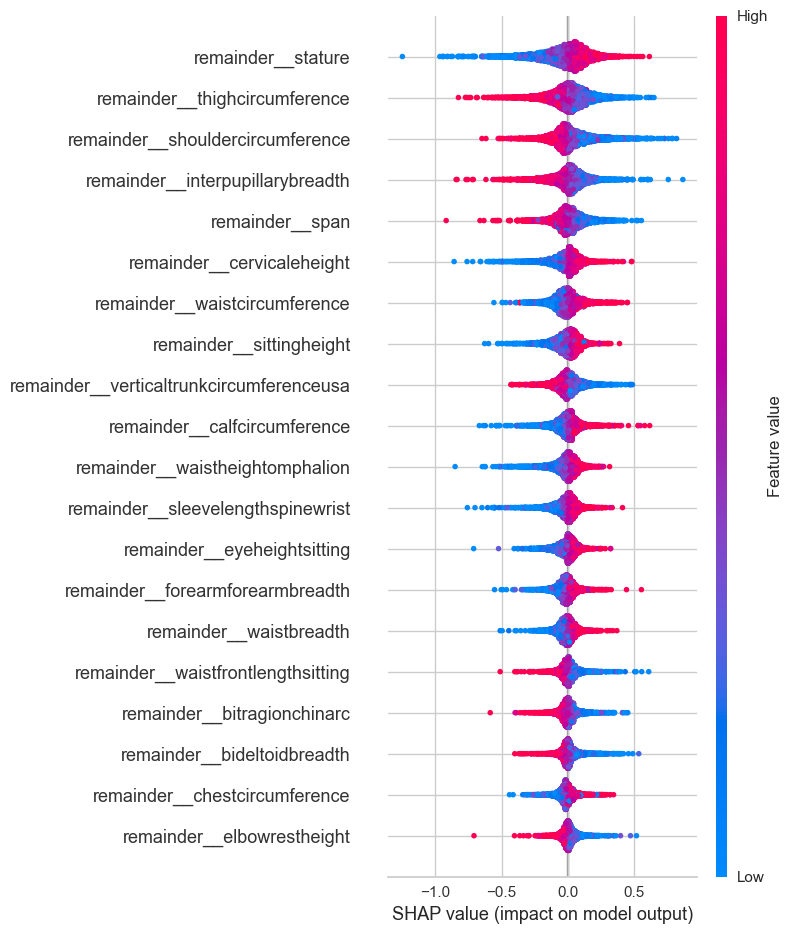

In [99]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

+ SHAP çubuk grafiği, küresel özellik önemini görselleştirmek için alternatif bir yol sunar.
+ Daha yüksek çubuklar, özelliğin model için daha önemli olduğunu gösterir.



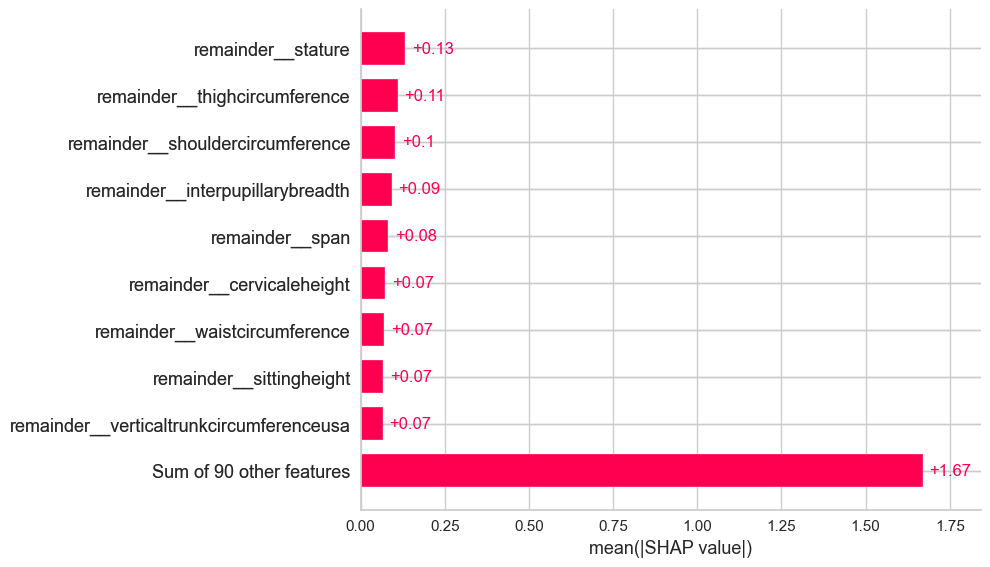

In [100]:
shap.plots.bar(shap_values)

## Yerel Yorumlama

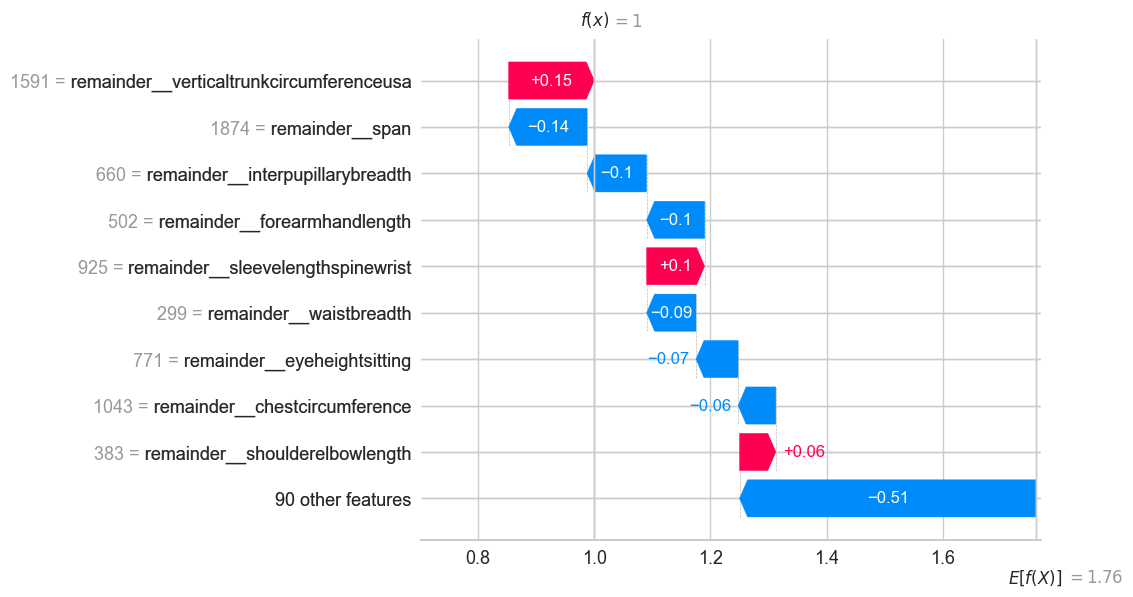

In [101]:
shap.plots.waterfall(shap_values[0])

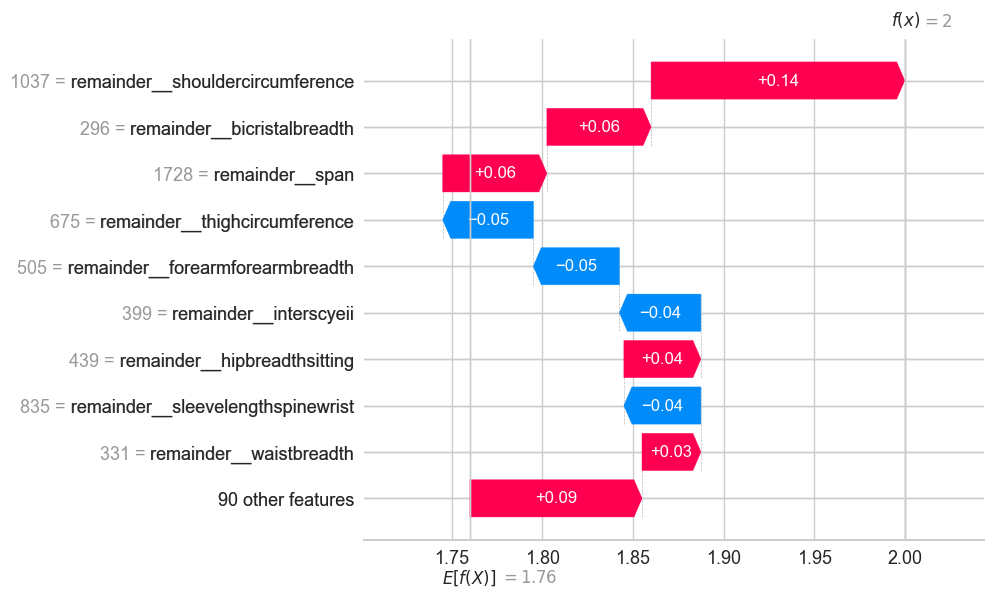

In [ ]:
shap.plots.waterfall(shap_values[1])

In [102]:
y_train.value_counts().sum()

4615

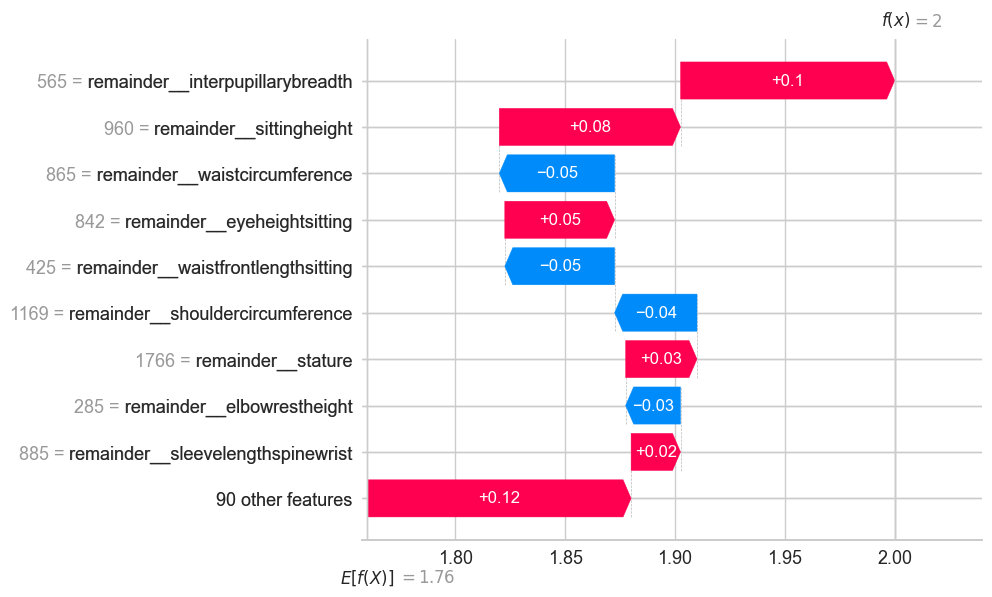

In [103]:
shap.plots.waterfall(shap_values[4614])

## SMOTE for X3 dataset

## Find the best threshold for multiclassification